In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("D:\\DATA SCIENCE\\Data sets\\day13\\NewspaperData.csv")

In [3]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


## Corelation

In [5]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

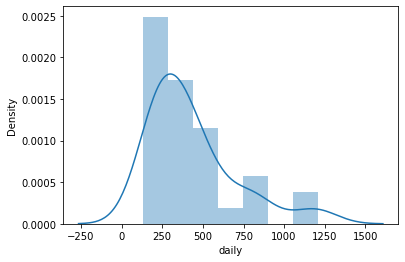

In [6]:
import seaborn as sns
sns.distplot(data['daily'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

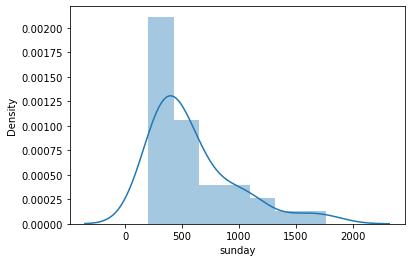

In [7]:
sns.distplot(data['sunday'])

In [8]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=data).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

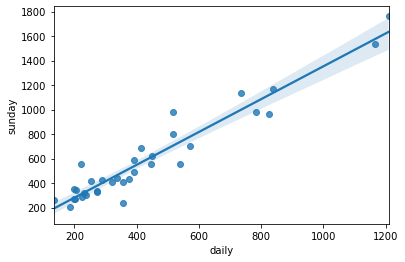

In [9]:
sns.regplot(x='daily',y='sunday',data=data)

In [10]:
#coefficient
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [11]:
#t and p value
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

## Predict for new data point

In [13]:
newdata=pd.Series([238.55,299.45])

In [14]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [15]:
model.predict(data_pred)

0    333.424585
1    415.013214
dtype: float64

## In class excercise

In [16]:
data1=pd.read_csv("D:\\DATA SCIENCE\\Data sets\\day13\\WC_AT.csv")

In [17]:
data1.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [18]:
data1.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [20]:
#correlation
data1.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

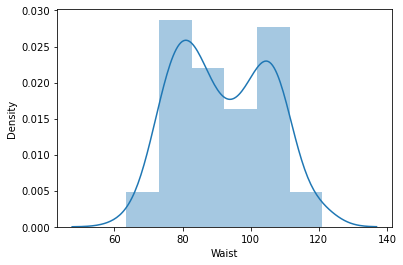

In [21]:
sns.distplot(data1['Waist'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

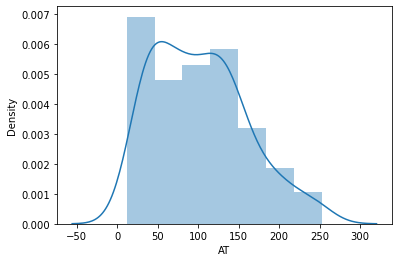

In [22]:
sns.distplot(data1['AT'])

In [23]:
import statsmodels.formula.api as smf
model=smf.ols('AT~Waist',data=data1).fit()

<AxesSubplot:xlabel='Waist', ylabel='AT'>

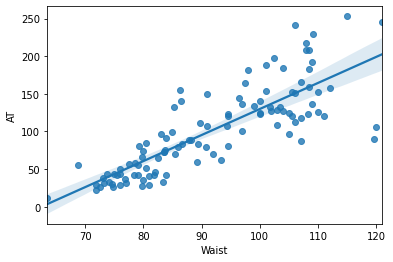

In [24]:
sns.regplot(x='Waist',y='AT',data=data1)

In [31]:
#Coefficient (beta(o),beta(1))
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [26]:
#t value and p value
print(model.tvalues ,'\n', model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [27]:
#find r square(explained variation / total variation)
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

## predict for new data point

In [28]:
newdata=pd.Series([75,85,90])

In [29]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [30]:
model.predict(data_pred)

0    43.432966
1    78.021560
2    95.315857
dtype: float64